# 1. tensorflow v2.xx에서 v1 사용하기

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # v2비활성화하고 v1을 활성화

Instructions for updating:
non-resource variables are not supported in the long term


## Tensorflow
- 그래프 정의 (tensor객체의 흐름)
- sess = tf.Session()을 실행
- sess.run()을 통해 변수값을 확인할 수 있음

In [7]:
# tensor = data(상수,변수)와 연산
node1 = tf.constant('Hello, Tensorflow')
sess = tf.Session()
print(sess.run(node1))
print(sess.run(node1).decode())

b'Hello, Tensorflow'
Hello, Tensorflow


In [11]:
# 간단한 수학 연산 tensor 그래프
node1 = tf.constant(10, dtype=tf.float16)
node2 = tf.constant(20, dtype=tf.float16)
node3 = tf.add(node1, node2)
sess = tf.Session()
print(sess.run([node1,node2,node3]))

[10.0, 20.0, 30.0]


In [2]:
# 타입 변경
import numpy as np
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
sess.run([node1, node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [14]:
# 평균값 계산 : tf.reduce_mean()
data = np.array([1., 2., 3., 4.])
m = tf.reduce_mean(data)
sess = tf.Session()
sess.run(m)

2.5

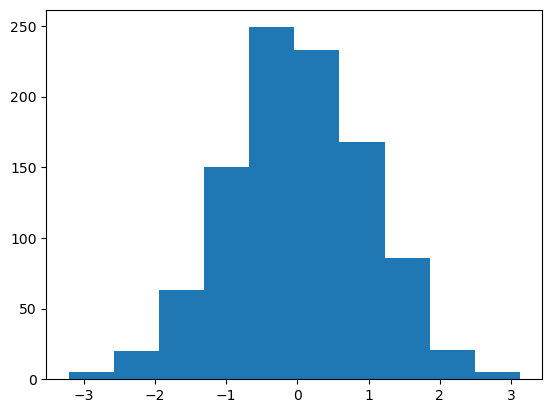

In [25]:
# tf.random_normal([size]) : 평균0이고, 표준편차가 1인 난수 size 개 발생. 난수갯수:독립변수갯수
import matplotlib.pyplot as plt
tensor=tf.random_normal([1000]) # 평균0, 표준편차가 1인 난수 2
sess = tf.Session()
plt.hist(sess.run(tensor))
plt.show()

# 2. tensorflow v1을 이용한 linear regression을 구현
## 2.1 독립변수 x가 1개, 종속변수 y가 1개

In [55]:
# tensor 그래프(객체 흐름) 정의
# data set(x, y)
x = np.array([1,2,3])
y = np.array([1,2,3])

# weight와 bias (처음에는 랜덤값으로 셋팅했다가, 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]),name='wieght')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothesis
H = W*x + b

# cost function (손실함수 = mse : 최소제곱법)
cost = tf.reduce_mean(tf.square(H-y))
'''
학습 목적 :cost가 최소가 되는 W, b를 찾는 것
cost 함수는 2차함수이므로 곡선 그래프. 곡선위 미분값이 줄어드는 방향으로 학습
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Session 생성
sess = tf.Session()

# 변수(W, b) 초기화
sess.run(tf.global_variables_initializer())

# 6000번 학습 (v2에서의 fit함수)
for step in range(6000):
    _, cost_val, W_val, b_val=sess.run([train,cost,W,b])
    if step%300 == 0:
        print('{}번째 cost:{}, W={}, b:{}'.format(step,
                                                cost_val,
                                                W_val,
                                                b_val))

0번째 cost:37.52639389038086, W=[-1.9124105], b:[0.9148544]
300번째 cost:0.11515118926763535, W=[0.60682595], b:[0.8937771]
600번째 cost:0.02717101015150547, W=[0.8090131], b:[0.43415806]
900번째 cost:0.00641126511618495, W=[0.90722686], b:[0.2108952]
1200번째 cost:0.0015127999940887094, W=[0.95493484], b:[0.10244374]
1500번째 cost:0.0003569570544641465, W=[0.9781093], b:[0.04976268]
1800번째 cost:8.422858809353784e-05, W=[0.98936635], b:[0.02417261]
2100번째 cost:1.987403265957255e-05, W=[0.9948346], b:[0.01174194]
2400번째 cost:4.689711659011664e-06, W=[0.9974908], b:[0.00570387]
2700번째 cost:1.1066513252444565e-06, W=[0.9987811], b:[0.00277081]
3000번째 cost:2.6134190989068884e-07, W=[0.99940765], b:[0.00134636]
3300번째 cost:6.176076539077258e-08, W=[0.99971205], b:[0.0006546]
3600번째 cost:1.4646849955113339e-08, W=[0.99985987], b:[0.00031874]
3900번째 cost:3.4862812636760054e-09, W=[0.9999317], b:[0.0001555]
4200번째 cost:8.294153697185891e-10, W=[0.9999666], b:[7.5728196e-05]
4500번째 cost:1.9475322743378598e

In [37]:
# 최종적으로 나온 회귀식 : H = W*x + b
sess.run([W, b])

[array([0.99999774], dtype=float32), array([4.4914573e-06], dtype=float32)]

In [40]:
W_, b_ = sess.run([W, b])
W_, b_

(array([1.0000044], dtype=float32), array([-8.861259e-06], dtype=float32))

In [41]:
print('최종 회귀식 : H = {}*x + {}'.format(W_[0], b_[0]))

최종 회귀식 : H = 1.0000044107437134*x + -8.861258720571641e-06


In [42]:
def to_predict(x):
    return W_[0]*x + b_[0]    

In [43]:
to_predict(3)

3.0000043709724196

## 2.2 predict을 하기 위한 placeholder 이용
- placeholder : 외부에서 데이터를 입력받을 수 있는 노드

In [48]:
a = tf.placeholder(tf.float16)
b = tf.placeholder(tf.float16)
ab = tf.add(a, b)
sess = tf.Session()
sess.run([a,b,ab], feed_dict={a : 10,
                        b : 20})

[array(10., dtype=float16), array(20., dtype=float16), 30.0]

In [52]:
sess.run(ab, feed_dict={a:np.array([1,2,3]),
                       b:np.array([1,2,3]) })

array([2., 4., 6.], dtype=float16)

In [62]:
# data set (H = 2x + 1)
x_data = np.array([1,2,3,5])
y_data = np.array([3,5,7,11])

# placeholder 설정(x,y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# weight & bias
W = tf.Variable(tf.random.normal([1]),name='wieght')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothesis
H = W*x + b

# cost function == loss function
cost = tf.reduce_mean(tf.square(H-y))

# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Session 생성 & 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 6000번 학습
for step in range(6000):
    _, cost_val, W_val, b_val=sess.run([train,cost,W,b],
                                      feed_dict={x:x_data,
                                                y:y_data})
    if step%300 == 0:
        print('{}/6000번째 cost:{}, W={}, b:{}'.format(step+1,
                                                     cost_val,
                                                     W_val,
                                                     b_val))

1/6000번째 cost:69.04054260253906, W=[0.4155211], b:[-0.7768389]
301/6000번째 cost:0.02777472697198391, W=[2.1008933], b:[0.6498998]
601/6000번째 cost:0.0022910996340215206, W=[2.0289774], b:[0.8994485]
901/6000번째 cost:0.0001889852137537673, W=[2.0083225], b:[0.971121]
1201/6000번째 cost:1.5590418115607463e-05, W=[2.0023904], b:[0.9917057]
1501/6000번째 cost:1.2876723758381559e-06, W=[2.0006871], b:[0.9976164]
1801/6000번째 cost:1.0653820936568081e-07, W=[2.0001976], b:[0.99931437]
2101/6000번째 cost:8.9558653826316e-09, W=[2.0000577], b:[0.99980146]
2401/6000번째 cost:7.535732038377319e-10, W=[2.000017], b:[0.9999424]
2701/6000번째 cost:9.936229616869241e-11, W=[2.0000064], b:[0.9999793]
3001/6000번째 cost:3.9690917219559196e-11, W=[2.0000043], b:[0.9999869]
3301/6000번째 cost:3.9690917219559196e-11, W=[2.0000043], b:[0.9999869]
3601/6000번째 cost:3.9690917219559196e-11, W=[2.0000043], b:[0.9999869]
3901/6000번째 cost:3.9690917219559196e-11, W=[2.0000043], b:[0.9999869]
4201/6000번째 cost:3.9690917219559196e-11,

In [63]:
# 최종 W, b
sess.run([W, b])

[array([2.0000043], dtype=float32), array([0.9999869], dtype=float32)]

In [64]:
# 예측하기
sess.run(H, feed_dict={x:5})

array([11.000008], dtype=float32)

In [65]:
sess.run(H, feed_dict={x: np.array([5,6,7])})

array([11.000008, 13.000012, 15.000017], dtype=float32)

## 2.3 scale 이 다른 데이터들의 linear regression

In [73]:
x_data = np.array([1,2,5,8,10])
y_data = np.array([5,15,68,80,95])

# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

#weight & bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]))

# Hypothesis
H = W*x+b

#cost function(loss function : 손실함수)
cost = tf.reduce_mean(tf.square(H-y))

#경사하강법
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.0001)
train = optimizer.minimize(cost)

# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1,6001):
    _, cost_val, W_val, b_val=sess.run([train,cost,W,b],
                                      feed_dict={x:x_data,
                                                y:y_data})
    if step%300 == 1:
        print('{}/6000번째 cost:{}, W={}, b:{}'.format(step,
                                                     cost_val,
                                                     W_val,
                                                     b_val))

1/6000번째 cost:2870.94970703125, W=[1.7448304], b:[-0.23519048]
301/6000번째 cost:103.43309020996094, W=[9.247043], b:[0.75798255]
601/6000번째 cost:79.69385528564453, W=[9.9440565], b:[0.83242136]
901/6000번째 cost:79.47818756103516, W=[10.010916], b:[0.822103]
1201/6000번째 cost:79.46463775634766, W=[10.019387], b:[0.8042423]
1501/6000번째 cost:79.45317077636719, W=[10.0224], b:[0.7859832]
1801/6000번째 cost:79.44217681884766, W=[10.024897], b:[0.7679802]
2101/6000번째 cost:79.43154907226562, W=[10.0272665], b:[0.75029445]
2401/6000번째 cost:79.42131805419922, W=[10.029594], b:[0.7329273]
2701/6000번째 cost:79.41142272949219, W=[10.031887], b:[0.7158729]
3001/6000번째 cost:79.40190124511719, W=[10.034176], b:[0.69911826]
3301/6000번째 cost:79.39268493652344, W=[10.036455], b:[0.6826464]
3601/6000번째 cost:79.38378143310547, W=[10.038625], b:[0.6664607]
3901/6000번째 cost:79.37522888183594, W=[10.040755], b:[0.6505665]
4201/6000번째 cost:79.36695861816406, W=[10.042847], b:[0.63495886]
4501/6000번째 cost:79.3589706

In [75]:
# 예측
sess.run(H, feed_dict={x:5})

array([50.82079], dtype=float32)

In [ ]:
# cost값이 멈춤 : local 최소값

## 2.4 scale이 다른 데이터들의 linear regression을 구현(조정 O)
### scale을 맞추는 방법 : 모든 데이터를 일정 범위내로 조정
- normalization(정규화) : 데이터의 최대값을 1, 최소값을 0으로 조정
```
                      x - Xmin
    normalization = ───────
                    Xmax - Xmin
        * 위의 식을 써도 되지만 라이브러리를 주로 씀(sklearn.preprocessing.MinMaxScaler이용)
```
- standardization(표준화) : 데이터의 평균을 0, 표준편차를 1로 조정
```
                        x - Xmean(평균)
    standardization = ──────────
                        Xstd(표준편차)
        * 위의 식을 써도 되지만 라이브러리를 주로 씀(sklearn.preprocessing.StandardScaler이용)
```


In [47]:
# 라이브러리를 쓰지 않고 정규화 : 예측할 경우 x데이터의 스케일을하고, 스케일된 예측값을 변환
x_data = np.array([1,2,5,8,10])
y_data = np.array([5,15,68,80,95])

scaled_x_data = (x_data - x_data.min())/(x_data.max()-x_data.min())
scaled_y_data = (y_data - y_data.min())/(y_data.max()-y_data.min())

print(scaled_x_data)
print(scaled_y_data)

[0.         0.11111111 0.44444444 0.77777778 1.        ]
[0.         0.11111111 0.7        0.83333333 1.        ]


In [48]:
# sklearn.preprocessing.MinMaxScaler이용
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([5,15,68,80,95]).reshape(-1,1)

from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler() # x_data를 표준화 시킬 객체
scaler_x.fit(x_data)
scaled_x_data = scaler_x.transform(x_data)

scaler_y = MinMaxScaler() # y_data를 표준화 시킬 객체
scaler_y.fit(y_data)
scaled_y_data = scaler_y.transform(y_data)

np.column_stack([x_data, scaled_x_data, y_data, scaled_y_data])

array([[ 1.        ,  0.        ,  5.        ,  0.        ],
       [ 2.        ,  0.11111111, 15.        ,  0.11111111],
       [ 5.        ,  0.44444444, 68.        ,  0.7       ],
       [ 8.        ,  0.77777778, 80.        ,  0.83333333],
       [10.        ,  1.        , 95.        ,  1.        ]])

In [44]:
# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

#weight & bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothesis
H = W*x+b

#cost function(loss function : 손실함수)
cost = tf.reduce_mean(tf.square(H-y))

#경사하강법
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(cost)

# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1,10001):
    _, cost_val, W_val, b_val=sess.run([train,cost,W,b],
                                      feed_dict={x:scaled_x_data,
                                                y:scaled_y_data})
    if step%300 == 1:
        print('{}/10000번째 cost:{}, W={}, b:{}'.format(step,
                                                     cost_val,
                                                     W_val,
                                                     b_val))

1/10000번째 cost:0.36835694313049316, W=[1.4324374], b:[-0.71568966]
301/10000번째 cost:0.12986740469932556, W=[1.5088019], b:[-0.46587446]
601/10000번째 cost:0.07132310420274734, W=[1.5249426], b:[-0.33718175]
901/10000번째 cost:0.05370354652404785, W=[1.5139519], b:[-0.26648298]
1201/10000번째 cost:0.0458274744451046, W=[1.491387], b:[-0.22387496]
1501/10000번째 cost:0.040643878281116486, W=[1.4645202], b:[-0.19517057]
1801/10000번째 cost:0.03650899603962898, W=[1.4367132], b:[-0.17361917]
2101/10000번째 cost:0.032996781170368195, W=[1.4094802], b:[-0.15598904]
2401/10000번째 cost:0.029961366206407547, W=[1.3834695], b:[-0.14071545]
2701/10000번째 cost:0.02732611633837223, W=[1.3589234], b:[-0.12702431]
3001/10000번째 cost:0.025035593658685684, W=[1.3358965], b:[-0.11451852]
3301/10000번째 cost:0.023044085130095482, W=[1.314359], b:[-0.10298035]
3601/10000번째 cost:0.02131241001188755, W=[1.2942444], b:[-0.09227935]
3901/10000번째 cost:0.019806688651442528, W=[1.2754734], b:[-0.08232839]
4201/10000번째 cost:0.018

In [30]:
# 예측
scaled_input=scaler_x.transform(np.array([[2]]))
print('2를 스케일 조정된 값 :',scaled_input)
scaled_output = sess.run(H, feed_dict={x:scaled_input})
print('예측값 :', scaler_y.inverse_transform(scaled_output))

2를 스케일 조정된 값 : [[0.11111111]]
예측값 : [[25.428455]]


In [31]:
sess.run([W,b])

[array([0.8737257], dtype=float32), array([0.1299022], dtype=float32)]

In [32]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)
np.column_stack([y_data, y_hat])

array([[ 5.        , 16.69119835],
       [15.        , 25.42845535],
       [68.        , 51.64022827],
       [80.        , 77.852005  ],
       [95.        , 95.3265152 ]])

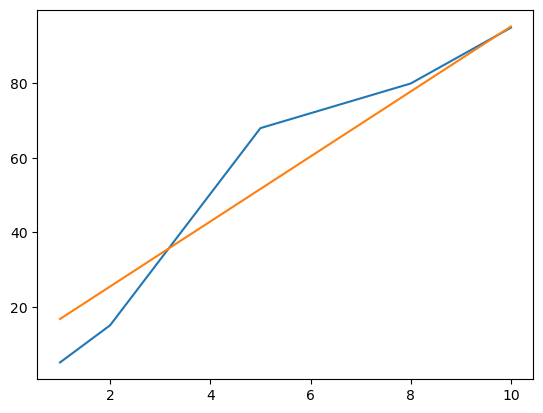

In [33]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data)
plt.plot(x_data, y_hat)

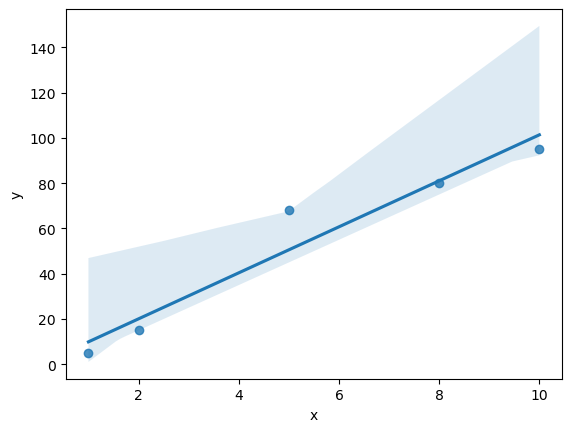

In [240]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame({'x':x_data[:,0],
                  'y':y_data[:,0]})
sns.regplot(data=df, x='x', y='y')
plt.show()

In [146]:
# 라이브러리를 쓰지 않고 표준화
x_data = np.array([1,2,5,8,10])
y_data = np.array([5,15,68,80,95])
scaled_x_data = (x_data - x_data.mean())/x_data.std()
scaled_y_data = (y_data - y_data.mean())/y_data.std()
print(scaled_x_data,scaled_y_data)

array([-1.32373476, -1.04563922,  0.42826713,  0.76198177,  1.17912508])

In [202]:
# 라이브러리를 써서 표준화
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([5,15,68,80,95]).reshape(-1,1)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_x.fit(x_data)
scaled_x_data = scaler_x.transform(x_data)

scaler_y = StandardScaler()
scaler_y.fit(y_data)
scaled_y_data = scaler_y.transform(y_data)
print(np.column_stack([x_data, scaled_x_data]))
print(np.column_stack([y_data, scaled_y_data]))

[[ 1.         -1.22474487]
 [ 2.         -0.93313895]
 [ 5.         -0.05832118]
 [ 8.          0.81649658]
 [10.          1.39970842]]
[[ 5.         -1.32373476]
 [15.         -1.04563922]
 [68.          0.42826713]
 [80.          0.76198177]
 [95.          1.17912508]]


In [203]:
# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

#weight & bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothesis
H = W*x+b

#cost function(loss function : 손실함수)
cost = tf.reduce_mean(tf.square(H-y))

#경사하강법
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(cost)

# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1,10001):
    _, cost_val, W_val, b_val=sess.run([train,cost,W,b],
                                      feed_dict={x:scaled_x_data,
                                                y:scaled_y_data})
    if step%1000 == 1:
        print('{}/10000번째 cost:{}, W={}, b:{}'.format(step,
                                                     cost_val,
                                                     W_val,
                                                     b_val))

1/10000번째 cost:3.1636879444122314, W=[-0.51960444], b:[0.93509173]
1001/10000번째 cost:0.11780086904764175, W=[0.7678689], b:[0.12629749]
2001/10000번째 cost:0.06223665922880173, W=[0.94176036], b:[0.01705831]
3001/10000번째 cost:0.06122301146388054, W=[0.9652475], b:[0.00230398]
4001/10000번째 cost:0.06120453029870987, W=[0.9684195], b:[0.00031119]
5001/10000번째 cost:0.06120418757200241, W=[0.9688471], b:[4.20296e-05]
6001/10000번째 cost:0.06120418384671211, W=[0.9688999], b:[5.6805798e-06]
7001/10000번째 cost:0.06120417267084122, W=[0.9688999], b:[7.732753e-07]
8001/10000번째 cost:0.06120418384671211, W=[0.9688999], b:[1.1289363e-07]
9001/10000번째 cost:0.061204176396131516, W=[0.9688999], b:[3.309014e-08]


In [204]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)
np.column_stack([y_data, y_hat])

array([[  5.        ,   9.92922401],
       [ 15.        ,  20.08893776],
       [ 68.        ,  50.56805801],
       [ 80.        ,  81.04718781],
       [ 95.        , 101.36660004]])

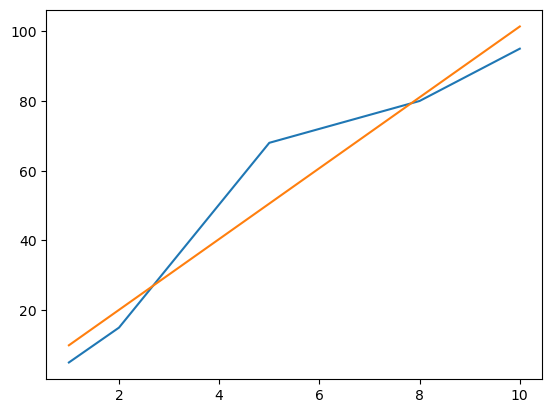

In [205]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data)
plt.plot(x_data, y_hat)

전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv (지역명, 평당분양가격, 연도, 월)
- 지역명2 : 지역명필드는 라벨인코딩하여 추가
- 평당분양가격n : 평당분양가격의 정규화 스케일 조정하여 추가
- 평당분양가격s : 평당분양가격의 표준화 스케일 조정하여 추가
- 연도n : 연도의 정규화 스케일 조정하여 추가
- 연도s : 연도의 표준화 스케일 조정하여 추가
- 월n : 월의 정규화 스케일 조정하여 추가
- 월s : 월의 정규화 스케일 조정하여 추가

In [70]:
import pandas as pd
df = pd.read_csv(r'D:\ai\Downloads\shareData\전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949')
new_df = df.melt(id_vars='지역', var_name='연도월', value_name='평당분양가격')
new_df['연도']=new_df['연도월'].apply(lambda x : int(x.split('년')[0]))
new_df['월']=new_df['연도월'].apply(lambda x : int(x.split('년')[1][:-1]))
new_df.drop('연도월',axis=1,inplace=True)
new_df=new_df.rename(columns={'지역':'지역명'})
new_df.head(2)

,지역명,평당분양가격,연도,월
0,서울,18189,2013,12
1,부산,8111,2013,12


In [74]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
new_df['지역명2'] = le.fit_transform(new_df['지역명'])

In [87]:
from sklearn.preprocessing import MinMaxScaler

price_data = np.array(new_df['평당분양가격']).reshape(-1, 1)
scaler = MinMaxScaler()
scaler.fit(price_data)
price_scaled_data = scaler.transform(price_data)
new_df['평당분양가격n'] = price_scaled_data

year_data = np.array(new_df['연도']).reshape(-1, 1)
scaler.fit(year_data)
year_scaled_data = scaler.transform(year_data)
new_df['연도n'] = year_scaled_data

month_data = np.array(new_df['월']).reshape(-1, 1)
scaler.fit(month_data)
month_scaled_data = scaler.transform(month_data)
new_df['월n'] = month_scaled_data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
price_data = np.array(new_df['평당분양가격']).reshape(-1, 1)
scaler.fit(price_data)
price_scaled_data = scaler.transform(price_data)
new_df['평당분양가격s'] = price_scaled_data

year_data = np.array(new_df['연도']).reshape(-1, 1)
scaler.fit(year_data)
year_scaled_data = scaler.transform(year_data)
new_df['연도s'] = year_scaled_data

month_data = np.array(new_df['월']).reshape(-1, 1)
scaler.fit(month_data)
month_scaled_data = scaler.transform(month_data)
new_df['월s'] = month_scaled_data

In [105]:
new_df.to_csv(r'D:\ai\Downloads\shareData\전국 평당분양가격_scaling.csv', encoding='cp949')

In [104]:
def scaling(df,column):
    data = np.array(df[column])
    scaled_data=(data-data.min())/(data.max()-data.min())
    df[column+'n']=scaled_data
scaling(new_df,'평당분양가격')
scaling(new_df,'연도')
scaling(new_df,'월')

def scaling(df,column):
    data = np.array(df[column])
    scaled_data=(data-data.mean())/data.std()
    df[column+'s']=scaled_data
scaling(new_df,'평당분양가격')
scaling(new_df,'연도')
scaling(new_df,'월')
new_df

,지역명,평당분양가격,연도,월,지역명2,평당분양가격n,연도n,월n,평당분양가격s,연도s,월s
0,서울,18189,2013,12,8,0.835270,0.0,1.000000,3.297226,-2.366432,1.767475
1,부산,8111,2013,12,7,0.166124,0.0,1.000000,-0.113291,-2.366432,1.767475
2,대구,8080,2013,12,5,0.164066,0.0,1.000000,-0.123782,-2.366432,1.767475
3,인천,10204,2013,12,11,0.305093,0.0,1.000000,0.595005,-2.366432,1.767475
4,광주,6098,2013,12,4,0.032468,0.0,1.000000,-0.794515,-2.366432,1.767475
...,...,...,...,...,...,...,...,...,...,...,...
352,전북,6580,2015,8,13,0.064471,1.0,0.636364,-0.631400,1.183216,0.589158
353,전남,6289,2015,8,12,0.045150,1.0,0.636364,-0.729878,1.183216,0.589158
354,경북,7037,2015,8,3,0.094814,1.0,0.636364,-0.476746,1.183216,0.589158
355,경남,7665,2015,8,2,0.136512,1.0,0.636364,-0.264223,1.183216,0.589158


## 2.5 독립변수 x가 여러개인 linear Regression

## csv를 array로 읽어오기

In [114]:
# 방법1
# 1. csv를 dataFrame 읽어와
data = pd.read_csv('data/ozone.csv')
# 2. 결측치 대체 or 삭제
# data.fillna(value=data.mean(), inplace=True)
data.dropna(how='any', axis=0, inplace=True)
X = data[['Ozone','Solar.R','Wind','Temp']].values
y = data['Ozone'].values
X.shape, y.shape

((111, 4), (111,))

In [119]:
# 방법2 : csv -> 넘파이배열
# data = np.loadtxt('data/ozone_nonan.csv', delimiter=',') NAN이 없어야 함
data = np.genfromtxt('data/ozone_nonan.csv', delimiter=',', skip_header=1, missing_values='NA', filling_values=np.nan)
data

ValueError: could not convert string 'Ozone' to float64 at row 0, column 1.